In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import datetime
import numpy as np
import pandas as pd
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
figsize(7, 7)

Use standard readlines to get the header data

In [3]:
fili = "C:/Users/apbarret/Documents/data/Sheba2/ShebaSpectral.csv"
f = open( fili, 'r' )

for il in np.arange(0,7):
    f.readline()
    
# Header lines are at lines 7, 8 and 9
# Get column headings
dtstr = f.readline().split(',')
target1 = f.readline().split(',')
target2 = f.readline().split(',')

# Strip first field
dtstr = dtstr[1:]
target1 = target1[1:]
target2 = target2[1:]

# Get the date and target descriptions (merged into one string) from the header lines
year=1997
date = [ datetime.datetime.strptime( d.strip()+' '+str(year), '%d-%b %Y') for d in dtstr ]
target = [ " ".join((t1.strip(),t2.strip())).strip() for t1,t2 in zip(target1, target2) ]

nspectra = len(date)

# Get the spectral albedos from the rest of the file
tmp= np.genfromtxt(f, delimiter=",")

f.close()

Put the dates and target descriptions into a Pandas dataframe

In [4]:
samples = pd.DataFrame( {'date': date, 'target': target})
samples[:5]

,date,target
0,1997-07-07,White ice
1,1997-07-07,Melt pond
2,1997-07-11,White ice
3,1997-07-11,Melt pond
4,1997-07-13,White ice


The spectra are put into a separate data frame indexed by wavelength.  Column names are integers that correspond to the index of the date and target description dataframe.  This makes it easy to select target groups by regular expressions.

In [5]:
spectra = pd.DataFrame( tmp[:,1:], index=tmp[:,0] )
spectra.index.values

array([  368.4,   371. ,   373.6,   376.2,   378.8,   381.4,   384. ,
         386.6,   389.2,   391.7,   394.3,   396.9,   399.5,   402.1,
         404.7,   407.3,   409.9,   412.5,   415.1,   417.7,   420.3,
         422.8,   425.4,   428. ,   430.6,   433.2,   435.8,   438.6,
         441.4,   444.2,   447. ,   449.8,   452.6,   455.3,   458.1,
         460.9,   463.7,   466.5,   469.3,   472.1,   474.9,   477.7,
         480.5,   483.3,   486.1,   488.9,   491.6,   494.4,   497.2,
         500. ,   502.8,   505.6,   508.4,   511.2,   514. ,   516.8,
         519.6,   522.4,   525.2,   527.9,   530.7,   533.5,   536.3,
         539.1,   541.9,   544.7,   547.5,   550.4,   553.3,   556.1,
         559. ,   561.9,   564.8,   567.6,   570.5,   573.4,   576.2,
         579.1,   582. ,   585. ,   587.9,   590.9,   593.8,   596.7,
         599.7,   602.6,   605.5,   608.5,   611.4,   614.4,   617.3,
         620.2,   623.2,   626.1,   629. ,   632. ,   634.9,   637.9,
         640.8,   64

In [7]:
spectra.shape

(252, 90)

The target descriptions are varied but some general themes emerge.  There are three basic targets; white ice, melt ponds and leads.  Melt ponds are further sub-divied by dark, light and general melt ponds.  Leads and ponds are also classified based on ice content: e.g. black ice, frazil, brash and pancakes.

In [41]:
samples['target'].value_counts()

Dark pond                 12
Light pond                12
Melt pond                 11
White ice                 10
White ice 2                6
Melt pond 4                6
Light pond 2               4
Dark pond 4                4
lead w black ice           4
Dark frazil (70)           4
lead w/ more brash         4
open mp                    2
frazil mp                  2
more brash                 1
Melt pond w/frazil         1
mp brash                   1
lead/crack                 1
lead/crack w brash         1
frazil (70)                1
Original melt pond         1
Dark pond frazil (7)       1
Pans+light frazil (70)     1
dtype: int64

Here we add another column that contains a surface-type/target code: P for pond, I for white ice and L for leads (which I assume is everything that is not a pond or white ice).

In [42]:
samples['code'] = 'M'
samples['code'].loc[samples['target'].str.contains('pond|mp')] = 'P'
samples['code'].loc[samples['target'].str.contains('White ice')] = 'I'
samples['code'].loc[samples['target'].str.contains('lead')] = 'L'

samples

,date,target,code
0,1997-07-07,White ice,I
1,1997-07-07,Melt pond,P
2,1997-07-11,White ice,I
3,1997-07-11,Melt pond,P
4,1997-07-13,White ice,I
5,1997-07-13,Melt pond,P
6,1997-07-15,Light pond 2,P
7,1997-07-15,Dark pond 4,P
8,1997-07-15,Melt pond,P
9,1997-07-15,White ice,I


Spectra grouped by descriptions can be selected using regular expressions as shown below.  These are copied to a new dataframe.  Plots can be made using Pandas plotting method.

<IPython.core.display.Javascript object>


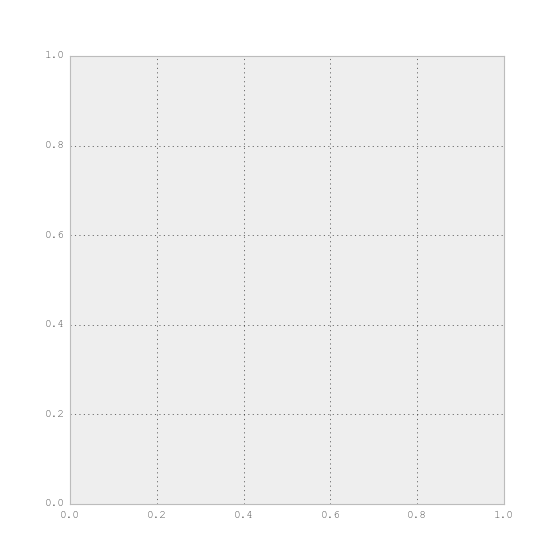

In [43]:
def add_modis_bands(ax=plt.gca()):

    d = {'lower': [620.,841.,459.,545.,1230.,1628.,2105.],
         'upper': [670.,876.,479.,565.,1250.,1652.,2155.]}
    band = pd.DataFrame(d)
    band['width'] = band['upper']-band['lower']
    
    for bnd in band.index:
        ax.add_patch( Rectangle((band['lower'][bnd], 0.), band['width'][bnd], 1., facecolor="grey"))


In [44]:
add_modis_bands()

<IPython.core.display.Javascript object>


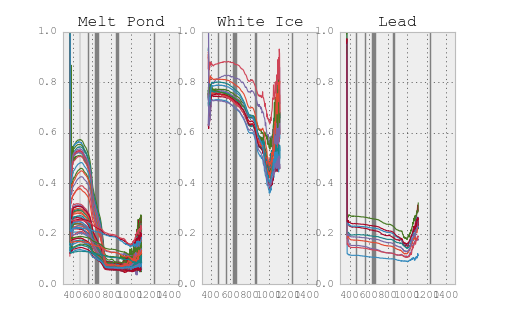

In [45]:
from matplotlib.patches import Rectangle

f, ax = plt.subplots(1,3)
spectra.loc[:,samples['code'].str.match('P')].plot(ylim=(0.,1.0),
                                                   xlim=(300.,1500.),
                                                   legend=False, 
                                                   title='Melt Pond',
                                                   ax=ax[0])
add_modis_bands(ax=ax[0])
spectra.loc[:,samples['code'].str.match('I')].plot(ylim=(0.,1.0),
                                                   xlim=(300.,1500.), 
                                                   legend=False, 
                                                   title='White Ice',
                                                   ax=ax[1])
add_modis_bands(ax=ax[1])
spectra.loc[:,samples['code'].str.match('L')].plot(ylim=(0.,1.0),
                                                   xlim=(300.,1500.), 
                                                   legend=False, 
                                                   title='Lead',
                                                   ax=ax[2])
add_modis_bands(ax=ax[2])


MODIS band 1 to 7 spectral response functions are are in a fortran file.  The code below reads this file and parses data into numpy arrays or maybe a dataframe 

In [46]:
import re
p0 = re.compile( '      DATA' )
p1 = re.compile( '     A.*,')
p2 = re.compile( '     A.*/' )

nw = 1501

band = 0

rsr = {}

rsr_file = "C:/Users/apbarret/Documents/data/Sheba2/MODIS.f"
f = open( rsr_file, "r" )
lines = f.readlines()
for l in lines:
    if p0.match( l ):
        wgt = np.zeros(nw) # Initialize weight function
        m = re.search('(\d+)\*0\.,', l)
        i0 = int(m.group(1)) # Extract index for start of non-zero values in function
    if p1.match( l ):
        val = l[6:].strip().split(',') # Extract values
        ww = [ float(v) for v in val[0:len(val)-1] ] # Convert to float
        i1 = i0+len(ww)
        wgt[i0:i1] = ww # Insert into array
        i0 = i1
    if p2.match( l ):
        rsr[band] = wgt # Add array to dictionary
        band += 1
f.close()

# Define wavelengths for filter function
filtwv = np.arange(250,4000.1,2.5)
#filtwv = np.arange(0.25,4.0001,0.0025)


In [47]:
def modis_bbalbedo( spwv, spal, flwv, filt ):
        
    # Subset spec. res. func. wavelength and responses to nonzero elements
    idx = np.nonzero(filt)
    xflwv = flwv[idx]
    yfilt = filt[idx]
    
    # Interpolate spectrometer spectral albedo to modis SRF wavelengths
    spalint = np.interp(xflwv, spwv, spal)
    
    # Calculate broadband albedo as weighted sum of spectral albedo and
    # filter response function
    modr = sum(yfilt*spalint)/sum(yfilt)

    return(modr)
    

In [48]:
samples['band1'] = [ modis_bbalbedo( spectra.index, spectra[col], filtwv, rsr[0]) for col in spectra.columns ]
samples['band2'] = [ modis_bbalbedo( spectra.index, spectra[col], filtwv, rsr[1]) for col in spectra.columns ]
samples['band3'] = [ modis_bbalbedo( spectra.index, spectra[col], filtwv, rsr[2]) for col in spectra.columns ]
samples['band4'] = [ modis_bbalbedo( spectra.index, spectra[col], filtwv, rsr[3]) for col in spectra.columns ]
samples.head()

,date,target,code,band1,band2,band3,band4
0,1997-07-07,White ice,I,0.734921,0.631495,0.761024,0.758194
1,1997-07-07,Melt pond,P,0.155805,0.069579,0.266932,0.244321
2,1997-07-11,White ice,I,0.739987,0.634536,0.766455,0.762049
3,1997-07-11,Melt pond,P,0.143933,0.070715,0.248322,0.226012
4,1997-07-13,White ice,I,0.719881,0.621464,0.743280,0.739512


<IPython.core.display.Javascript object>


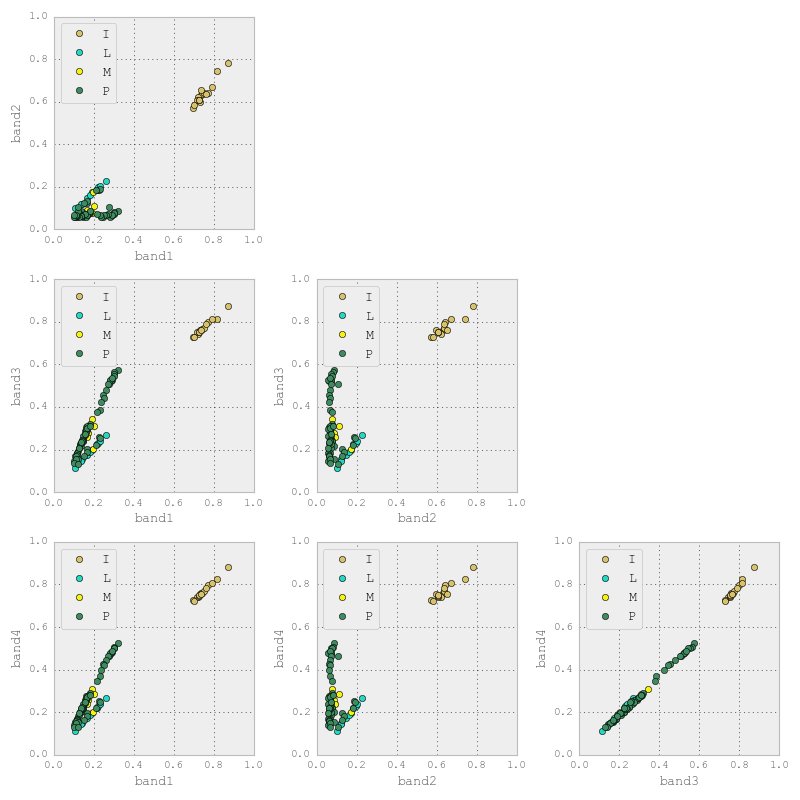

In [49]:
import matplotlib.pyplot as plt

def plot_panel(ax,groups,xcol,ycol):
    ax.set_color_cycle(colors)
    ax.margins(0.05)
    for name, group in groups:
        ax.plot(group[xcol], group[ycol], marker='o', linestyle='', ms=6, label=name)
    ax.legend(numpoints=1, loc='upper left')
    ax.set_xlim([0.0,1.0])
    ax.set_ylim([0.0,1.0])
    ax.set_xlabel(xcol)
    ax.set_ylabel(ycol)
    
groups = samples.groupby('code')

# Plot
plt.rcParams.update(pd.tools.plotting.mpl_stylesheet)
colors = pd.tools.plotting._get_standard_colors(len(groups), color_type='random')
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(331)
ax2 = plt.subplot(334)
ax3 = plt.subplot(337)
plot_panel(ax1,groups,'band1','band2')
plot_panel(ax2,groups,'band1','band3')
plot_panel(ax3,groups,'band1','band4')

ax4 = plt.subplot(335)
ax5 = plt.subplot(338)
plot_panel(ax4,groups,'band2','band3')
plot_panel(ax5,groups,'band2','band4')

ax6 = plt.subplot(3,3,9)
plot_panel(ax6,groups,'band3','band4')

plt.tight_layout()
plt.show()

fig.savefig('sheba_spectra_band_ratios.png')

In [72]:
#samples['distance'] = np.sqrt(samples['band1']**2 + samples['band2']**2 + 
#                              samples['band3']**2 + samples['band4']**2)
groups.columns


AttributeError: Cannot access attribute 'columns' of 'DataFrameGroupBy' objects, try using the 'apply' method

<IPython.core.display.Javascript object>


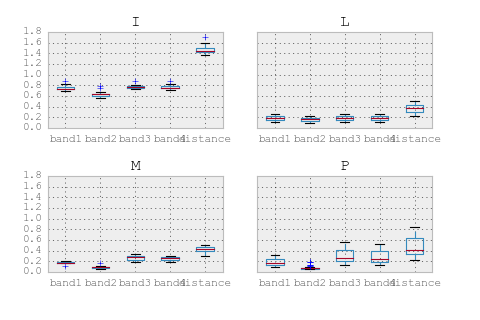

OrderedDict([('I', {'boxes': [<matplotlib.lines.Line2D object at 0x0000000017257940>, <matplotlib.lines.Line2D object at 0x0000000017260B70>, <matplotlib.lines.Line2D object at 0x0000000017286240>, <matplotlib.lines.Line2D object at 0x0000000017286CC0>, <matplotlib.lines.Line2D object at 0x00000000172B0390>], 'fliers': [<matplotlib.lines.Line2D object at 0x00000000172605F8>, <matplotlib.lines.Line2D object at 0x000000001727BC88>, <matplotlib.lines.Line2D object at 0x000000001712BF60>, <matplotlib.lines.Line2D object at 0x00000000172A3DD8>, <matplotlib.lines.Line2D object at 0x00000000173084A8>], 'medians': [<matplotlib.lines.Line2D object at 0x0000000017260080>, <matplotlib.lines.Line2D object at 0x000000001727B710>, <matplotlib.lines.Line2D object at 0x0000000017137C88>, <matplotlib.lines.Line2D object at 0x00000000172A3860>, <matplotlib.lines.Line2D object at 0x00000000172BBEF0>], 'means': [], 'whiskers': [<matplotlib.lines.Line2D object at 0x000000001724AD68>, <matplotlib.lines.Line

In [75]:
groups.boxplot()